# ¿Qué es la Ampliación de Datos?

La ampliación de datos es una técnica que permite aumentar artificialmente el conjunto de entrenamiento al crear copias modificadas de un conjunto de datos utilizando los datos existentes. Esto incluye realizar cambios menores en el conjunto de datos o usar aprendizaje profundo para generar nuevos puntos de datos.

## Datos Aumentados vs. Datos Sintéticos

Los datos aumentados provienen de datos originales con algunos cambios menores. En el caso de la ampliación de imágenes, realizamos transformaciones geométricas y en el espacio de color (inversión, redimensionamiento, recorte, brillo, contraste) para aumentar el tamaño y la diversidad del conjunto de entrenamiento.

Los datos sintéticos se generan artificialmente sin utilizar el conjunto de datos original. A menudo se utilizan DNNs (Redes Neuronales Profundas) y GANs (Redes Antagónicas Generativas) para generar datos sintéticos.

## ¿Cuándo Deberías Usar la Ampliación de Datos?

* Para evitar que los modelos se sobreajusten.
* Cuando el conjunto de entrenamiento inicial es demasiado pequeño.
* Para mejorar la precisión del modelo.

## Limitaciones de la Ampliación de Datos

* Los sesgos en el conjunto de datos original persisten en los datos aumentados.
* Asegurar la calidad de la ampliación de datos es costoso.
* Se requiere investigación y desarrollo para construir un sistema con aplicaciones avanzadas. Por ejemplo, generar imágenes de alta resolución usando GANs puede ser un desafío.
* Encontrar un enfoque efectivo de ampliación de datos puede ser desafiante.


## Técnicas de Ampliación de Datos

### Técnicas de Ampliación de Datos de Imagen

Algunos ejemplos de Técnicas de Ampliación de Datos de Imagen pueden ser:

* Transformaciones Geométricas: acercamiento, estiramiento, recorte, inversión, rotación, redimensionamiento.
* Operaciones de Filtrado con Kernel: aplicar operaciones de filtrado matemático para alterar el desenfoque y la resolución de las imágenes.
* Combinación de diferentes imágenes.
* Alteración del Espacio de Color: ajustar los parámetros del espacio de color en uso. Comúnmente, RGB (Rojo, Verde, Azul) o HSV (Matiz, Saturación, Valor).

### Técnicas de Ampliación de Datos de Texto

Algunos ejemplos de Técnicas de Ampliación de Datos de Texto pueden ser:

* Reemplazar palabras con sinónimos usando tablas de búsqueda.
* Agregar/eliminar palabras al azar.
* Mezclar el orden de las palabras en una frase.
* Traducir entre idiomas.
* Usar incrustaciones de palabras contextuales (reemplazar una palabra con otra que esté lo más cerca posible en una representación de incrustación de palabras como Glove, Word2Vec, etc.).
* Usar modelos preentrenados (por ejemplo, Transformadores) para reemplazar palabras manteniendo el contexto de toda la frase.

### Técnicas de Ampliación de Datos de Audio

Algunos ejemplos de Técnicas de Ampliación de Datos de Audio pueden ser:

* Alterar la velocidad/tono de los clips.
* Desplazar la grabación hacia atrás o hacia adelante unos segundos.
* Agregar ruido aleatorio/gaussiano a la muestra de audio.

### Técnicas de Ampliación de Datos de Video
Algunos ejemplos de Técnicas de Ampliación de Datos de Video pueden ser:

* Técnicas basadas en la Ampliación de Imágenes.
* Técnicas de simulación para unir fotogramas.
* Transformaciones temporales: sobremuestreo, submuestreo, etc.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import requests

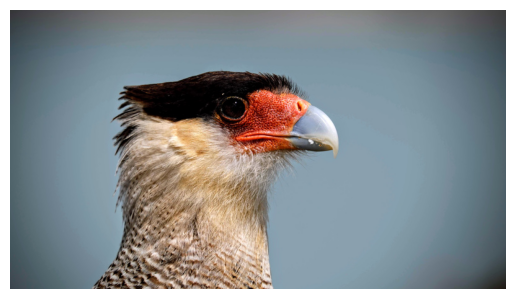

In [3]:
url = 'https://github.com/dufourpascal/stepupai/raw/master/tutorials/data_augmentation/image.jpg'
r = requests.get(url, allow_redirects=True)
open('image.jpg', 'wb').write(r.content)

image = load_img('image.jpg')
image = img_to_array(image).astype(int)
data = np.expand_dims(image, 0)
plt.axis('off')
plt.imshow(data[0])

In [5]:
def default_datagen():
    datagen = ImageDataGenerator( fill_mode='constant', dtype=int)
    datagen.fit(data)
    return datagen

def plot_augmentation(datagen, data, n_rows=1, n_cols=5):
    n_images = n_rows * n_cols
    gen_flow = datagen.flow(data)

    plt.figure(figsize=(n_cols*4, n_rows*3))
    for image_index in range(n_images):
        image = next(gen_flow)
        plt.subplot(n_rows, n_cols, image_index+1)
        plt.axis('off')
        plt.imshow(image[0], vmin=0, vmax=255)

## Desplazamiento de Ancho y Alto

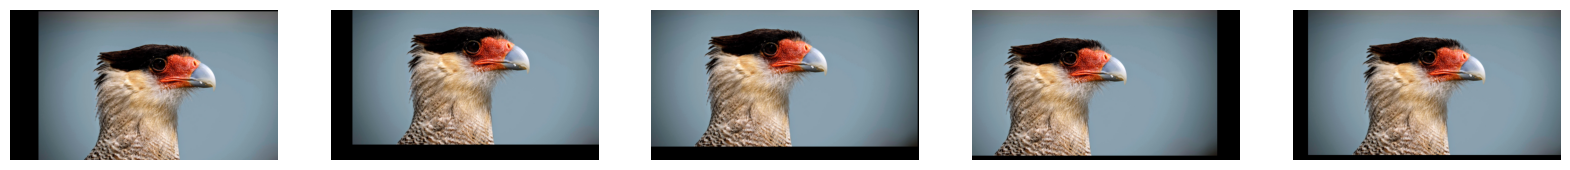

In [6]:
datagen = default_datagen()
datagen.width_shift_range = 0.2
datagen.height_shift_range = 0.2
plot_augmentation(datagen, data)

## Flips

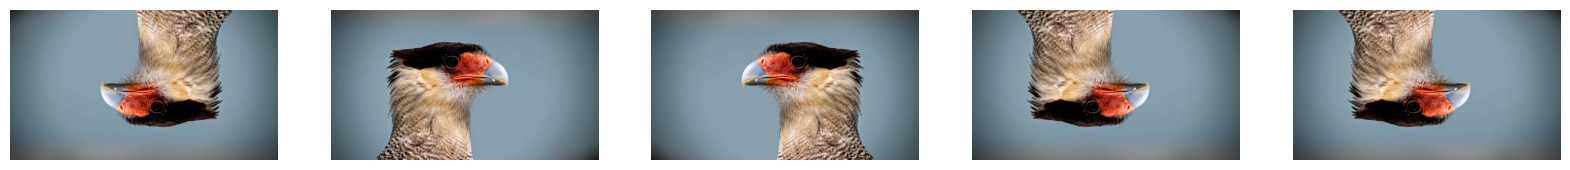

In [7]:
datagen = default_datagen()
datagen.horizontal_flip = True
datagen.vertical_flip = True
plot_augmentation(datagen, data)

## Rotacion

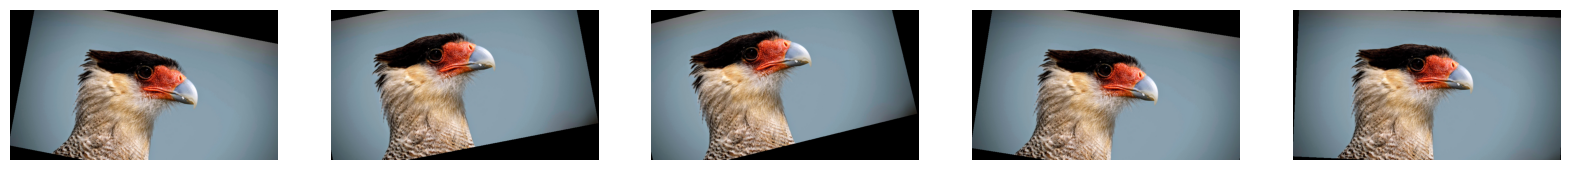

In [8]:
datagen = default_datagen()
datagen.rotation_range = 25
plot_augmentation(datagen, data)

## Zoom

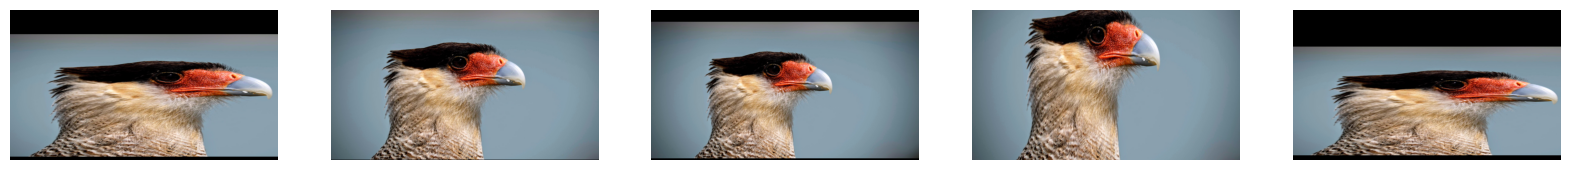

In [9]:
datagen = default_datagen()
datagen.zoom_range = [0.5, 1.5]
plot_augmentation(datagen, data)

## Shear


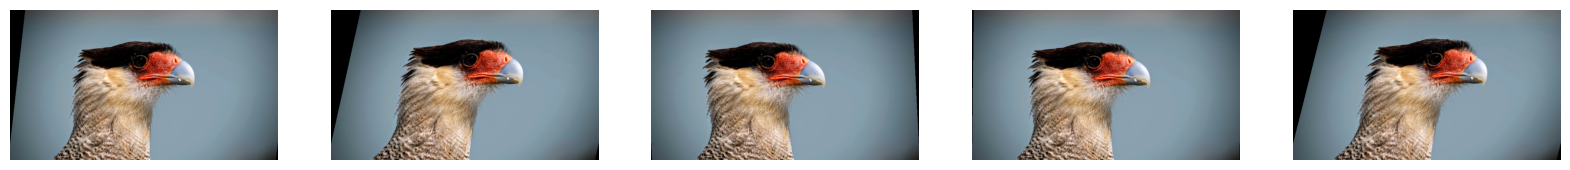

In [10]:
datagen = default_datagen()
datagen.shear_range = 20
plot_augmentation(datagen, data)

## Brightness

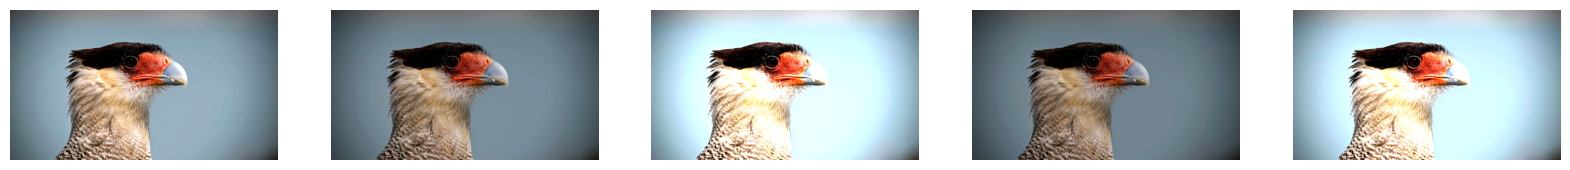

In [11]:
datagen = default_datagen()
datagen.brightness_range = [0.5, 2.0]
plot_augmentation(datagen, data)

## Combinacion de transformaciones

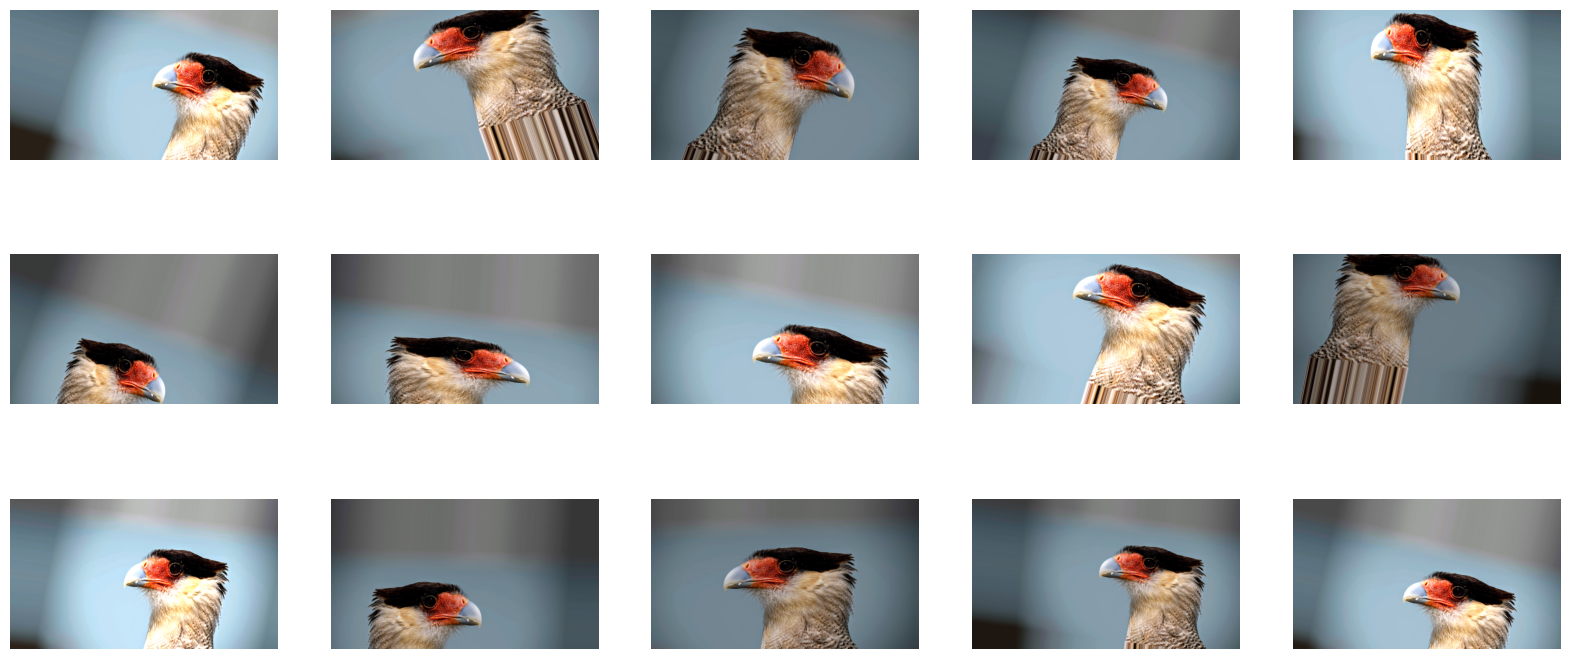

In [12]:
datagen = default_datagen()
datagen.fill_mode='nearest'
datagen.horizontal_flip=True
datagen.width_shift_range=0.2
datagen.height_shift_range=0.2
datagen.zoom_range=[0.8, 1.2]
datagen.rotation_range=20
datagen.shear_range=10
datagen.brightness_range = [0.75, 1.5]
plot_augmentation(datagen, data, n_rows=3, n_cols=5)